# Loading Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

df_movies=pd.read_csv('/content/drive/MyDrive/Submission Recommendation System/data/movies.csv')
df_ratings=pd.read_csv('/content/drive/MyDrive/Submission Recommendation System/data/ratings.csv')

In [3]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [6]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [7]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


# Exploratory Data Analysis

## Movies

In [8]:
df_movies.isna().sum()

,0
movieId,0
title,0
genres,0


In [9]:
df_movies.duplicated().sum()

np.int64(0)

In [10]:
print('Jumlah Film:', len(df_movies.movieId.unique()))
print('Jumlah Judul Film:', len(df_movies.title.unique()))
print('Jumlah Genre:', len(df_movies.genres.unique()))

Jumlah Film: 62423
Jumlah Judul Film: 62325
Jumlah Genre: 1639


## df_ratings

In [11]:
df_ratings.isna().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


In [12]:
df_ratings.duplicated().sum()

np.int64(0)

In [13]:
print('Jumlah userId: ', len(df_ratings.userId.unique()))
print('Jumlah film yang diulas: ', len(df_ratings.movieId.unique()))
print('Jumlah data rating: ', len(df_ratings))

Jumlah userId:  162541
Jumlah film yang diulas:  59047
Jumlah data rating:  25000095


# Data Preprocessing

In [5]:
df_movies['genres']=df_movies['genres'].str.replace('|', ' ')

In [18]:
import re

def clean_title(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\([^)]*\)', '', text)  # hapus tanda kurung dan isinya, misal "(1995)"
    text = re.sub(r'[^a-z0-9\s]', '', text)  # hapus karakter selain huruf, angka, dan spasi
    text = re.sub(r'\s+', ' ', text).strip()  # hapus spasi berlebih
    return text

In [19]:
df_movies['clean_title'] = df_movies['title'].apply(clean_title)

In [20]:
df_movies.head()

,movieId,title,genres,clean_title
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,toy story
1,2,Jumanji (1995),Adventure Children Fantasy,jumanji
2,3,Grumpier Old Men (1995),Comedy Romance,grumpier old men
3,4,Waiting to Exhale (1995),Comedy Drama Romance,waiting to exhale
4,5,Father of the Bride Part II (1995),Comedy,father of the bride part ii


In [7]:
df_movies['genres'].eq('(no genres listed)').sum()

np.int64(5062)

In [8]:
df_movies= df_movies[df_movies['genres'] != '(no genres listed)']

In [30]:
df_movies['genres_list'] = df_movies['genres']

In [9]:
list_genre=pd.Series([genre for genres_list in df_movies['genres'].str.split() for genre in genres_list]).unique()
list_genre

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical',
       'Western', 'Film-Noir'], dtype=object)

In [19]:
print('Jumlah jenis genre:', len(list_genre))

Jumlah jenis genre: 19


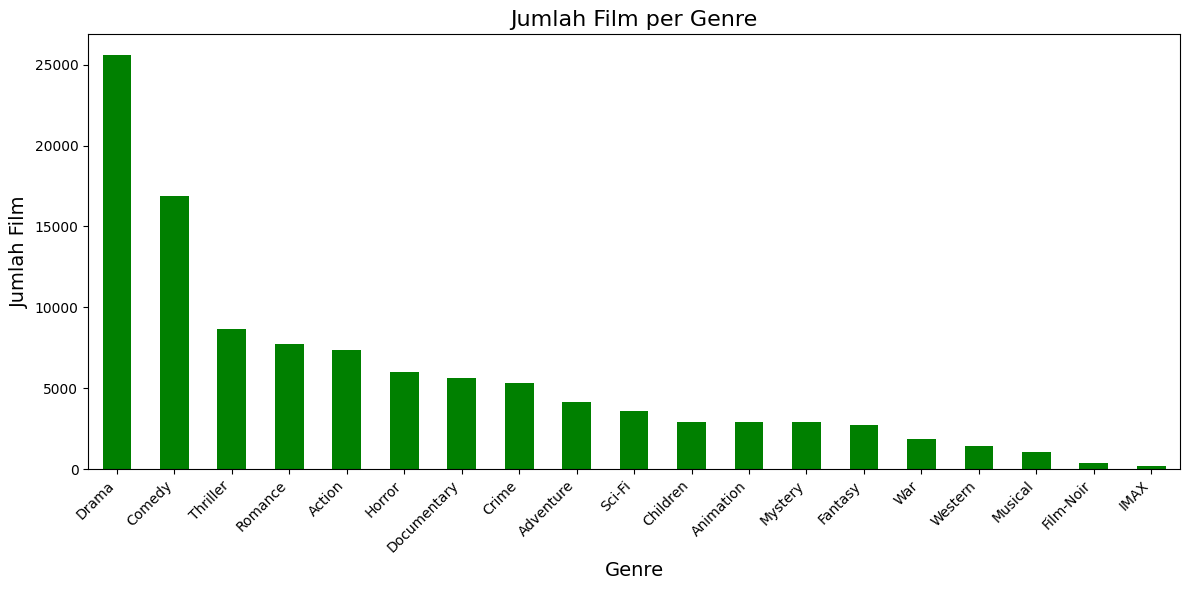

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Hitung jumlah film per genre dari df_movies_cleaned
genre_counts = pd.Series(
    [genre for genres_list in df_movies['genres'].str.split() for genre in genres_list]
).value_counts()

# Plot
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='green')
plt.title('Jumlah Film per Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Jumlah Film', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## df_ratings

In [11]:
df_ratings=df_ratings.drop(columns='timestamp', axis=1)

In [22]:
df_ratings.head()

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


In [12]:
combined_data = pd.merge(df_ratings, df_movies, on='movieId', how='inner')

In [13]:
combined_data.head()

,userId,movieId,rating,title,genres
0,1,296,5.0,Pulp Fiction (1994),Comedy Crime Drama Thriller
1,1,306,3.5,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama
2,1,307,5.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,1,665,5.0,Underground (1995),Comedy Drama War
4,1,899,3.5,Singin' in the Rain (1952),Comedy Musical Romance


In [25]:
# Menghitung rata-rata rating per film
rating_rata2 = combined_data.groupby('title').agg({'rating': 'mean'})

# Urutkan dari yang tertinggi dan ambil 10 teratas
top_10_rating = rating_rata2.sort_values(by='rating', ascending=False).head(10)

print("Top 10 Film dengan Rata-Rata Rating Tertinggi:")
print(top_10_rating)

Top 10 Film dengan Rata-Rata Rating Tertinggi:
                               rating
title                                
Humans vs Zombies (2011)          5.0
The Lullaby (2017)                5.0
Harri Pinter, Drecksau (2017)     5.0
Ghost (2010)                      5.0
Ready to Run (2000)               5.0
Santosh Subramaniam (2008)        5.0
ReMoved (2013)                    5.0
Chhichhore (2019)                 5.0
Cheesecake Casserole (2012)       5.0
The Mafia Triangle (1981)         5.0


In [26]:
user_ids = df_ratings['userId'].unique().tolist()
movie_ids = df_ratings['movieId'].unique().tolist()

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

df_ratings['user'] = df_ratings['userId'].map(user_to_user_encoded)
df_ratings['movie'] = df_ratings['movieId'].map(movie_to_movie_encoded)

In [27]:
num_users = len(user_ids)
num_movies = len(movie_ids)
min_rating = df_ratings['rating'].min()
max_rating = df_ratings['rating'].max()

In [28]:
df_ratings = df_ratings.sample(frac=1, random_state=42)
x = df_ratings[['user', 'movie']].values
y = df_ratings['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

In [29]:
x = df_ratings[['user', 'movie']].values
y = df_ratings['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

In [30]:
train_indices = int(0.8 * len(x))
x_train, x_val = x[:train_indices], x[train_indices:]
y_train, y_val = y[:train_indices], y[train_indices:]

# Recommendation

In [31]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_movies, embedding_size=50, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.user_embedding = layers.Embedding(num_users, embedding_size,
                                               embeddings_initializer='he_normal',
                                               embeddings_regularizer=keras.regularizers.l2(1e-6))
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(num_movies, embedding_size,
                                                embeddings_initializer='he_normal',
                                                embeddings_regularizer=keras.regularizers.l2(1e-6))
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.reduce_sum(user_vector * movie_vector, axis=1, keepdims=True)
        x = dot_user_movie + user_bias + movie_bias
        return tf.nn.sigmoid(x)

model = RecommenderNet(num_users, num_movies, 50)
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [33]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.1, verbose=1),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

history = model.fit(
    x_train, y_train,
    batch_size=1024,
    validation_data=(x_val, y_val),
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20
19526/19532 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6011 - root_mean_squared_error: 0.1998
Epoch 1: val_loss improved from inf to 0.59767, saving model to best_model.h5


19532/19532 ━━━━━━━━━━━━━━━━━━━━ 101s 5ms/step - loss: 0.6011 - root_mean_squared_error: 0.1998 - val_loss: 0.5977 - val_root_mean_squared_error: 0.1972 - learning_rate: 1.0000e-04
Epoch 2/20
19524/19532 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5965 - root_mean_squared_error: 0.1960
Epoch 2: val_loss improved from 0.59767 to 0.59472, saving model to best_model.h5


19532/19532 ━━━━━━━━━━━━━━━━━━━━ 140s 5ms/step - loss: 0.5965 - root_mean_squared_error: 0.1960 - val_loss: 0.5947 - val_root_mean_squared_error: 0.1948 - learning_rate: 1.0000e-04
Epoch 3/20
19524/19532 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5937 - root_mean_squared_error: 0.1937
Epoch 3: val_loss improved from 0.59472 to 0.59286, saving model to best_model.h5


19532/19532 ━━━━━━━━━━━━━━━━━━━━ 142s 5ms/step - loss: 0.5937 - root_mean_squared_error: 0.1937 - val_loss: 0.5929 - val_root_mean_squared_error: 0.1932 - learning_rate: 1.0000e-04
Epoch 4/20
19522/19532 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5920 - root_mean_squared_error: 0.1921
Epoch 4: val_loss improved from 0.59286 to 0.59154, saving model to best_model.h5


19532/19532 ━━━━━━━━━━━━━━━━━━━━ 142s 5ms/step - loss: 0.5920 - root_mean_squared_error: 0.1921 - val_loss: 0.5915 - val_root_mean_squared_error: 0.1921 - learning_rate: 1.0000e-04
Epoch 5/20
19525/19532 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5907 - root_mean_squared_error: 0.1910
Epoch 5: val_loss improved from 0.59154 to 0.59051, saving model to best_model.h5


19532/19532 ━━━━━━━━━━━━━━━━━━━━ 142s 5ms/step - loss: 0.5907 - root_mean_squared_error: 0.1910 - val_loss: 0.5905 - val_root_mean_squared_error: 0.1912 - learning_rate: 1.0000e-04
Epoch 6/20
19529/19532 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5896 - root_mean_squared_error: 0.1900
Epoch 6: val_loss improved from 0.59051 to 0.58969, saving model to best_model.h5


19532/19532 ━━━━━━━━━━━━━━━━━━━━ 142s 5ms/step - loss: 0.5896 - root_mean_squared_error: 0.1900 - val_loss: 0.5897 - val_root_mean_squared_error: 0.1906 - learning_rate: 1.0000e-04
Epoch 7/20
19523/19532 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5887 - root_mean_squared_error: 0.1894
Epoch 7: val_loss improved from 0.58969 to 0.58902, saving model to best_model.h5


19532/19532 ━━━━━━━━━━━━━━━━━━━━ 141s 5ms/step - loss: 0.5887 - root_mean_squared_error: 0.1894 - val_loss: 0.5890 - val_root_mean_squared_error: 0.1900 - learning_rate: 1.0000e-04
Epoch 8/20
19526/19532 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5880 - root_mean_squared_error: 0.1888
Epoch 8: val_loss improved from 0.58902 to 0.58847, saving model to best_model.h5


19532/19532 ━━━━━━━━━━━━━━━━━━━━ 142s 5ms/step - loss: 0.5880 - root_mean_squared_error: 0.1888 - val_loss: 0.5885 - val_root_mean_squared_error: 0.1896 - learning_rate: 1.0000e-04
Epoch 9/20
19528/19532 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5875 - root_mean_squared_error: 0.1884
Epoch 9: val_loss improved from 0.58847 to 0.58802, saving model to best_model.h5


19532/19532 ━━━━━━━━━━━━━━━━━━━━ 143s 5ms/step - loss: 0.5875 - root_mean_squared_error: 0.1884 - val_loss: 0.5880 - val_root_mean_squared_error: 0.1893 - learning_rate: 1.0000e-04
Epoch 10/20
19521/19532 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5870 - root_mean_squared_error: 0.1880
Epoch 10: val_loss improved from 0.58802 to 0.58764, saving model to best_model.h5


19532/19532 ━━━━━━━━━━━━━━━━━━━━ 142s 5ms/step - loss: 0.5870 - root_mean_squared_error: 0.1880 - val_loss: 0.5876 - val_root_mean_squared_error: 0.1890 - learning_rate: 1.0000e-04
Epoch 11/20
19524/19532 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5865 - root_mean_squared_error: 0.1875
Epoch 11: val_loss improved from 0.58764 to 0.58733, saving model to best_model.h5


19532/19532 ━━━━━━━━━━━━━━━━━━━━ 153s 6ms/step - loss: 0.5865 - root_mean_squared_error: 0.1875 - val_loss: 0.5873 - val_root_mean_squared_error: 0.1887 - learning_rate: 1.0000e-04
Epoch 12/20
19522/19532 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5862 - root_mean_squared_error: 0.1873
Epoch 12: val_loss improved from 0.58733 to 0.58707, saving model to best_model.h5


19532/19532 ━━━━━━━━━━━━━━━━━━━━ 100s 5ms/step - loss: 0.5862 - root_mean_squared_error: 0.1873 - val_loss: 0.5871 - val_root_mean_squared_error: 0.1885 - learning_rate: 1.0000e-04
Epoch 13/20
19521/19532 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5858 - root_mean_squared_error: 0.1870
Epoch 13: val_loss improved from 0.58707 to 0.58686, saving model to best_model.h5


19532/19532 ━━━━━━━━━━━━━━━━━━━━ 140s 5ms/step - loss: 0.5858 - root_mean_squared_error: 0.1870 - val_loss: 0.5869 - val_root_mean_squared_error: 0.1883 - learning_rate: 1.0000e-04
Epoch 14/20
19522/19532 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5856 - root_mean_squared_error: 0.1867
Epoch 14: val_loss improved from 0.58686 to 0.58667, saving model to best_model.h5


19532/19532 ━━━━━━━━━━━━━━━━━━━━ 98s 5ms/step - loss: 0.5856 - root_mean_squared_error: 0.1867 - val_loss: 0.5867 - val_root_mean_squared_error: 0.1881 - learning_rate: 1.0000e-04
Epoch 15/20
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5854 - root_mean_squared_error: 0.1866
Epoch 15: val_loss improved from 0.58667 to 0.58652, saving model to best_model.h5


19532/19532 ━━━━━━━━━━━━━━━━━━━━ 142s 5ms/step - loss: 0.5854 - root_mean_squared_error: 0.1866 - val_loss: 0.5865 - val_root_mean_squared_error: 0.1879 - learning_rate: 1.0000e-04
Epoch 16/20
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5853 - root_mean_squared_error: 0.1863
Epoch 16: val_loss improved from 0.58652 to 0.58639, saving model to best_model.h5


19532/19532 ━━━━━━━━━━━━━━━━━━━━ 97s 5ms/step - loss: 0.5853 - root_mean_squared_error: 0.1863 - val_loss: 0.5864 - val_root_mean_squared_error: 0.1878 - learning_rate: 1.0000e-04
Epoch 17/20
19528/19532 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5851 - root_mean_squared_error: 0.1861
Epoch 17: val_loss improved from 0.58639 to 0.58629, saving model to best_model.h5


19532/19532 ━━━━━━━━━━━━━━━━━━━━ 142s 5ms/step - loss: 0.5851 - root_mean_squared_error: 0.1861 - val_loss: 0.5863 - val_root_mean_squared_error: 0.1877 - learning_rate: 1.0000e-04
Epoch 18/20
19532/19532 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5850 - root_mean_squared_error: 0.1861
Epoch 18: val_loss improved from 0.58629 to 0.58619, saving model to best_model.h5


19532/19532 ━━━━━━━━━━━━━━━━━━━━ 145s 5ms/step - loss: 0.5850 - root_mean_squared_error: 0.1861 - val_loss: 0.5862 - val_root_mean_squared_error: 0.1875 - learning_rate: 1.0000e-04
Epoch 19/20
19529/19532 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5849 - root_mean_squared_error: 0.1859
Epoch 19: val_loss improved from 0.58619 to 0.58612, saving model to best_model.h5


19532/19532 ━━━━━━━━━━━━━━━━━━━━ 98s 5ms/step - loss: 0.5849 - root_mean_squared_error: 0.1859 - val_loss: 0.5861 - val_root_mean_squared_error: 0.1875 - learning_rate: 1.0000e-04
Epoch 20/20
19530/19532 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5848 - root_mean_squared_error: 0.1857
Epoch 20: val_loss improved from 0.58612 to 0.58605, saving model to best_model.h5


19532/19532 ━━━━━━━━━━━━━━━━━━━━ 99s 5ms/step - loss: 0.5848 - root_mean_squared_error: 0.1857 - val_loss: 0.5860 - val_root_mean_squared_error: 0.1874 - learning_rate: 1.0000e-04


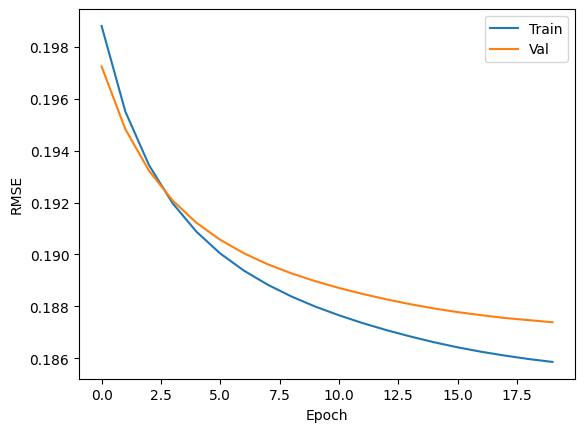

In [34]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend(["Train", "Val"])
plt.show()

In [35]:
user_id = df_ratings['userId'].sample(1).iloc[0]
encoded_user_id = user_to_user_encoded[user_id]

movies_watched = df_ratings[df_ratings['userId'] == user_id]['movieId'].tolist()
movies_not_watched = [mid for mid in movie_ids if mid not in movies_watched]
movies_not_watched_encoded = [movie_to_movie_encoded[mid] for mid in movies_not_watched]

user_movie_array = np.hstack(
    ([[encoded_user_id]] * len(movies_not_watched_encoded), np.array(movies_not_watched_encoded).reshape(-1, 1))
)

ratings_pred = model.predict(user_movie_array).flatten()
top_indices = ratings_pred.argsort()[-10:][::-1]

recommended_movie_ids = [movie_encoded_to_movie[movies_not_watched_encoded[i]] for i in top_indices]
recommended_movies = df_movies[df_movies['movieId'].isin(recommended_movie_ids)]

1840/1840 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [36]:
print(f"\nRekomendasi untuk User ID {user_id}")
print("========================================")
print("Film dengan rating tertinggi dari user:")
top_watched = df_ratings[df_ratings['userId'] == user_id].sort_values(by='rating', ascending=False).head(5)
print(df_movies[df_movies['movieId'].isin(top_watched['movieId'])][['title', 'genres']])

print("\nTop 10 Rekomendasi Film:")
print(recommended_movies[['title', 'genres']])


Rekomendasi untuk User ID 8868
Film dengan rating tertinggi dari user:
                                                   title  \
2480                                  Matrix, The (1999)   
4790   Harry Potter and the Sorcerer's Stone (a.k.a. ...   
5704      Harry Potter and the Chamber of Secrets (2002)   
14937                                   Inception (2010)   
18241                     Amazing Spider-Man, The (2012)   

                                                genres  
2480                            Action Sci-Fi Thriller  
4790                        Adventure Children Fantasy  
5704                                 Adventure Fantasy  
14937  Action Crime Drama Mystery Sci-Fi Thriller IMAX  
18241                     Action Adventure Sci-Fi IMAX  

Top 10 Rekomendasi Film:
                             title                     genres
8565     Harakiri (Seppuku) (1962)                      Drama
32968       The Blue Planet (2001)                Documentary
40597        

## Content Based Filtering

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [31]:
vectorizer_title = TfidfVectorizer(ngram_range=(1,2))
tfidf_title = vectorizer_title.fit_transform(df_movies['clean_title'])

vectorizer_genres = TfidfVectorizer(ngram_range=(1,2))
tfidf_genres = vectorizer_genres.fit_transform(df_movies['genres_list'])

In [24]:
def search_by_title(title, top_n=5):
    title = title.lower().strip()
    query_vec = vectorizer_title.transform([title])
    similarity = cosine_similarity(query_vec, tfidf_title).flatten()
    indices = np.argpartition(similarity, -top_n)[-top_n:]
    results = df_movies.iloc[indices].copy()
    results['similarity'] = similarity[indices]
    results = results.sort_values(by='similarity', ascending=False)
    return results

In [25]:
def search_similar_genres(genres, top_n=10):
    genres = genres.lower().strip()
    query_vec = vectorizer_genres.transform([genres])
    similarity = cosine_similarity(query_vec, tfidf_genres).flatten()
    indices = np.argpartition(similarity, -top_n)[-top_n:]
    results = df_movies.iloc[indices].copy()
    results['similarity'] = similarity[indices]
    results = results.sort_values(by='similarity', ascending=False)
    return results

In [26]:
def scores_calculator(movie_id):
    # Cari user yang memberi rating >= 4 pada movie_id tersebut
    similar_users = combined_data[(combined_data['movieId'] == movie_id) & (combined_data['rating'] >= 4)]['userId'].unique()

    # Film yang disukai user tersebut (rating >= 4)
    similar_user_recs = combined_data[(combined_data['userId'].isin(similar_users)) & (combined_data['rating'] >= 4)]['movieId']
    similar_user_recs = similar_user_recs.value_counts() / len(similar_users)  # proporsi user yg suka film tsb

    # Semua user yang menonton film tsb
    all_users = combined_data[(combined_data['movieId'].isin(similar_user_recs.index)) & (combined_data['rating'] >= 4)]
    all_users_recs = all_users['movieId'].value_counts() / all_users['userId'].nunique()

    # Genre dari film yang dipilih
    genres_of_selected_movie = df_movies[df_movies['movieId'] == movie_id]['genres_list'].values[0]

    # Cari film dengan genre mirip
    movies_with_similar_genres = search_similar_genres(genres_of_selected_movie)

    # Beri bobot 1.5 untuk film yang mirip genre dan disukai user
    indices = [idx for idx in movies_with_similar_genres['movieId'] if idx in similar_user_recs.index]
    similar_user_recs.loc[indices] *= 1.5

    # Beri bobot 0.9 untuk film yang mirip genre dan disukai oleh semua user
    indices = [idx for idx in movies_with_similar_genres['movieId'] if idx in all_users_recs.index]
    all_users_recs.loc[indices] *= 0.9

    rec_percentages = pd.concat([similar_user_recs, all_users_recs], axis=1).fillna(0)
    rec_percentages.columns = ['similar', 'all']
    rec_percentages['score'] = rec_percentages['similar'] / rec_percentages['all'].replace(0, np.nan)
    rec_percentages = rec_percentages.replace(np.nan, 0)
    rec_percentages = rec_percentages.sort_values('score', ascending=False)
    return rec_percentages

In [27]:
def recommendation_results(user_input, choice=0):
    title_candidates = search_by_title(user_input)
    if len(title_candidates) == 0:
        return pd.DataFrame()  # tidak ada hasil

    movie_id = title_candidates.iloc[choice]['movieId']
    scores = scores_calculator(movie_id)

    # Gabungkan dengan data movie
    results = scores.head(10).merge(df_movies, left_index=True, right_on='movieId')[['title', 'score', 'genres_list']]
    results = results.rename(columns={'genres_list': 'genres'})
    return results

In [28]:
user_input = "Toy Story"
print("Are you looking for (please choose a number):")
candidates = search_by_title(user_input)
for i in range(min(5, len(candidates))):
    print(f"{i}: {candidates.iloc[i]['title']}")

Are you looking for (please choose a number):
0: Toy Story 4 (2019)
1: Toy Story 3 (2010)
2: Toy Story (1995)
3: Toy Story 2 (1999)
4: Toy Story of Terror (2013)


In [32]:
choice = 0

if choice in range(len(candidates)):
    print("\nRecommendations based on your choice:")
    print(recommendation_results(user_input, choice))
else:
    print("Sorry, invalid choice!")


Recommendations based on your choice:
                                     title       score  \
59767                   Toy Story 4 (2019)  712.004386   
50316                        Cafard (2015)  712.004386   
57349               Eastern Condors (1987)  712.004386   
61865         Nikki Glaser: Bangin' (2019)  712.004386   
59910            Operation Valkyrie (2004)  712.004386   
29858                    Documented (2014)  712.004386   
51248        The Proud Family Movie (2005)  712.004386   
53590     A Very Potter Senior Year (2013)  712.004386   
46028                      Bad Girl (2016)  712.004386   
61282  Saga of Tanya the Evil Movie (2019)  712.004386   

                                    genres  
59767  Adventure Animation Children Comedy  
50316                  Animation Drama War  
57349                           Action War  
61865                               Comedy  
59910                                Drama  
29858                          Documentary  
51248  